<a href="https://colab.research.google.com/github/mgt412/course_notebooks/blob/master/MGT412_Lecture_8_Empirical_Asset_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 8: Empirical Asset Pricing

## Manipulating and visualizing financial data with CRSP and Fama-French

In [0]:
from pandas import *
import numpy as np
import matplotlib.pyplot as plt

# this code is to be able to see the plot in the Jupyter notebook
%matplotlib inline

#### Upload CRSP Dataset (Center for Research in Security Prices)

In [0]:
url="https://github.com/mgt412/course_notebooks/blob/master/Datasets/CRSP_Data.xlsx?raw=true"
crsp = read_excel(url,index_col=0)

In [12]:
crsp.head()

,PERMNO,date,TICKER,PRC,mktrf,smb,hml,rf,umd
0,10001,20090831,EGAS,8.5400,0.0333,-0.0090,0.0776,0.0001,-0.0884
1,10001,20090930,EGAS,8.5999,0.0408,0.0245,0.0092,0.0001,-0.0493
2,10001,20091030,EGAS,8.8800,-0.0259,-0.0423,-0.0418,0.0000,0.0265
3,10001,20091130,EGAS,8.8980,0.0556,-0.0249,-0.0017,0.0000,0.0029
4,10001,20091231,EGAS,10.3000,0.0275,0.0611,0.0001,0.0001,0.0291


#### Data description

1. **PERMNO** = CRSP Permanent Company Number
2. **date** = in format YYYYMMDD
3. **TICKER** = trading ticker for the stock
4. **PRC** = end-of-month price
5. **mktrf** = market return minus risk free rate
6. **smb** = small minus big factor (Fama-French "size" factor)
7. **hml** = high minus low book-to-market factor (Fama-French "value" factor)
8. **rf** = risk-free rate
9. **umd** = up minus down momentum factor

In [0]:
# convert date from integers to Pandas date format
crsp['date'] = to_datetime(crsp['date'], format='%Y%m%d')

#### Compute returns

In [0]:
# we compute returns as percent change from previous period
crsp["RET"] = crsp.groupby("TICKER")["PRC"].pct_change(1)

In [27]:
crsp.head()

,PERMNO,date,TICKER,PRC,mktrf,smb,hml,rf,umd,RET
0,10001,2009-08-31,EGAS,8.5400,0.0333,-0.0090,0.0776,0.0001,-0.0884,NaN
1,10001,2009-09-30,EGAS,8.5999,0.0408,0.0245,0.0092,0.0001,-0.0493,0.007014
2,10001,2009-10-30,EGAS,8.8800,-0.0259,-0.0423,-0.0418,0.0000,0.0265,0.032570
3,10001,2009-11-30,EGAS,8.8980,0.0556,-0.0249,-0.0017,0.0000,0.0029,0.002027
4,10001,2009-12-31,EGAS,10.3000,0.0275,0.0611,0.0001,0.0001,0.0291,0.157563


#### Selecting a few stocks (Apple, Oracle, NVidia, Amazon, EBay)

In [0]:
# Selecting stocks
lstocks=['AAPL', 'ORCL', 'NVDA', 'AMZN', 'EBAY']
df = crsp[crsp['TICKER'].isin(lstocks)]  # look at the isin command

In [33]:
df.groupby('TICKER').count()

,PERMNO,date,PRC,mktrf,smb,hml,rf,umd,RET
TICKER,,,,,,,,,
AAPL,144,144,144,144,144,144,144,144,143
AMZN,144,144,144,144,144,144,144,144,143
EBAY,144,144,144,144,144,144,144,144,143
NVDA,144,144,144,144,144,144,144,144,143
ORCL,144,144,144,144,144,144,144,144,143


#### We provide the summary statistics of the returns (mean, std, min, max) and the 10th, 25th, 50th, 75th, 90th percentiles of the 5 stock returns.

In [86]:
df2 = df.pivot(columns='TICKER', values='RET', index='date')
stat = df2.describe(percentiles=[.1, .25, .5, .75, .9])
stat

TICKER,AAPL,AMZN,EBAY,NVDA,ORCL
count,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.016075,0.031020,0.004361,0.019546,0.008914
std,0.116410,0.102091,0.098519,0.136956,0.065732
min,-0.853191,-0.254018,-0.533201,-0.388889,-0.181818
10%,-0.086671,-0.084772,-0.088257,-0.154994,-0.076505
25%,-0.026284,-0.032091,-0.044829,-0.050297,-0.038811
50%,0.019953,0.026226,0.000000,0.025728,0.010892
75%,0.075403,0.083982,0.058379,0.094252,0.047721
90%,0.128549,0.144888,0.104477,0.157530,0.094065
max,0.237701,0.541342,0.331055,0.553247,0.229114


#### We plot a bar graph showing the mean and standard deviation of each stock returns.

Text(0.5, 0, '')

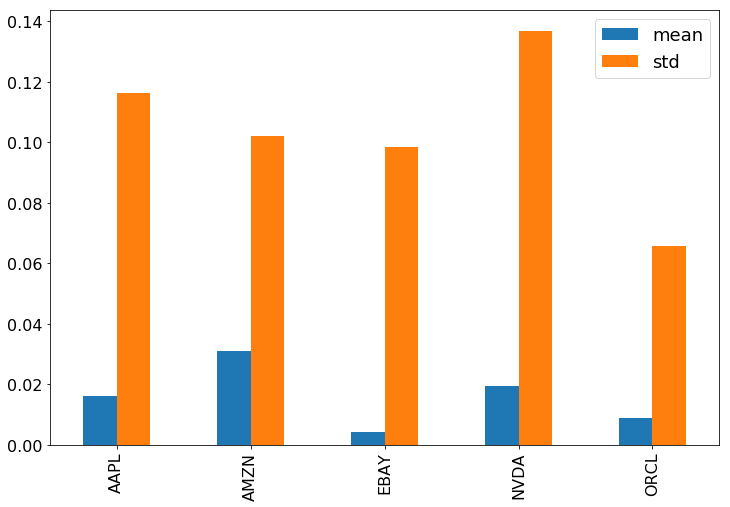

In [87]:
stat = stat.loc[['mean', 'std']].T
stat[['mean', 'std']].plot.bar(figsize=(12,8))
plt.legend(fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("")

#### We plot the cumulative excess returns (excess of risk-free rate)

(array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <a list of 8 Text yticklabel objects>)

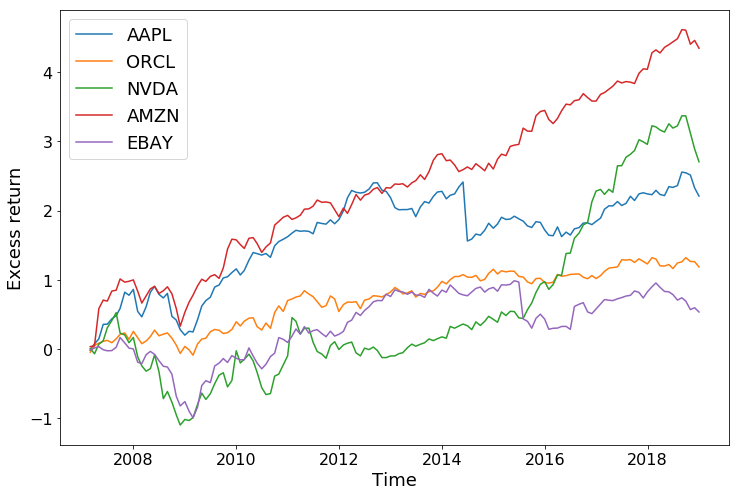

In [53]:
crsp['RetRf']=crsp['RET']-crsp['rf']

plt.figure(figsize=(12,8))

for stock in lstocks:
  plt.plot(crsp[crsp.TICKER==stock]['date'],crsp[crsp.TICKER==stock]['RetRf'].cumsum(), label=stock)
  
plt.xlabel('Time', fontsize=18)
plt.ylabel('Excess return', fontsize=18)
plt.legend(loc='best',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#### Computing and plotting the Sharpe ratio

In [0]:
df_sharpe = crsp[crsp['TICKER'].isin(lstocks)]
df_sharpe = df_sharpe.pivot(columns='TICKER', values='RetRf', index='date')
stat_sharpe = df_sharpe.describe(percentiles=[.1, .25, .5, .75, .9])

In [65]:
stat_sharpe

TICKER,AAPL,AMZN,EBAY,NVDA,ORCL
count,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.015460,0.030405,0.003745,0.018930,0.008298
std,0.116326,0.101982,0.098616,0.137070,0.065726
min,-0.853191,-0.254318,-0.533201,-0.390389,-0.181818
10%,-0.086671,-0.084872,-0.089637,-0.155294,-0.076605
25%,-0.026334,-0.032141,-0.044908,-0.050347,-0.039261
50%,0.019953,0.026126,0.000000,0.025728,0.010892
75%,0.074182,0.083982,0.057954,0.094252,0.047521
90%,0.128209,0.144048,0.104457,0.157110,0.093578
max,0.234501,0.536942,0.330855,0.553147,0.229014


In [0]:
stat_sharpe = stat_sharpe.loc[['mean', 'std']].T
stat_sharpe['Sharpe']=stat_sharpe['mean']/stat_sharpe['std']

Text(0.5, 0, '')

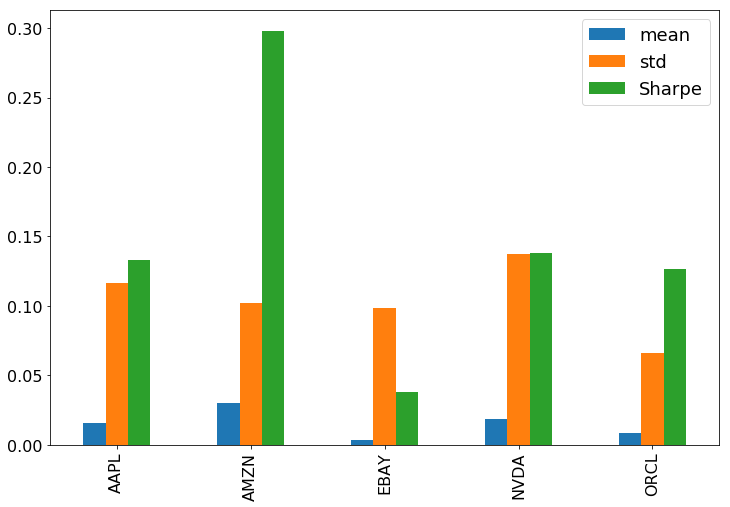

In [85]:
stat_sharpe[['mean', 'std','Sharpe']].plot.bar(figsize=(12, 8))
plt.legend(fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("")

## Asset pricing models and testing

1. The goal of this exercise is to test: 
> * the CAPM (only Market matters) 
> * the 3-factor Fama-French model (Market + SMB + HML factors), and 
> * the 4-factor Carhart model (Fama-French + Momentum). 

2. To do so, we will run a time-series OLS regression.

3. First, we need form an equally weighted portfolio with our 5 stocks.

4. **Challenge**: Rebalancing. We invest $1 in each stock at the beginning of the period. Simply averaging returns for each stock each month would imply that we rebalance the portfolio each month.

In [0]:
df = crsp[crsp['TICKER'].isin(lstocks)]  # re-load the data

#### Pivot the data so columns are stocks and row are dates. Obtain gross returns by adding 1

In [112]:
df_pivot=df.pivot(columns='TICKER', values='RET', index='date') 
df_pivot=1+df_pivot # to obtain gross returns
df_pivot.head()

TICKER,AAPL,AMZN,EBAY,NVDA,ORCL
date,,,,,
2007-01-31,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.986936,1.039023,0.989812,1.011419,0.957459
2007-03-30,1.098097,1.016607,1.033999,0.928387,1.103469
2007-04-30,1.074158,1.541342,1.023831,1.142808,1.036955
2007-05-31,1.214339,1.127344,0.959340,1.053177,1.030851


#### Allocate one dollar initially to all of the five stocks

In [113]:
# allocate one dollar to each of the five stocks initially
df_pivot.loc[to_datetime('2007-01-31')]=1 
df_pivot.head()

TICKER,AAPL,AMZN,EBAY,NVDA,ORCL
date,,,,,
2007-01-31,1.000000,1.000000,1.000000,1.000000,1.000000
2007-02-28,0.986936,1.039023,0.989812,1.011419,0.957459
2007-03-30,1.098097,1.016607,1.033999,0.928387,1.103469
2007-04-30,1.074158,1.541342,1.023831,1.142808,1.036955
2007-05-31,1.214339,1.127344,0.959340,1.053177,1.030851


#### Roll over the investment

In [115]:
EW_Invest = df_pivot.cumprod()
EW_Invest.head()

TICKER,AAPL,AMZN,EBAY,NVDA,ORCL
date,,,,,
2007-01-31,1.000000,1.000000,1.000000,1.000000,1.000000
2007-02-28,0.986936,1.039023,0.989812,1.011419,0.957459
2007-03-30,1.083751,1.056278,1.023464,0.938989,1.056527
2007-04-30,1.164120,1.628086,1.047854,1.073083,1.095571
2007-05-31,1.413636,1.835413,1.005249,1.130147,1.129371


#### Computing the value of investment each month (and the return)

In [0]:
EW_Invest['portfolio_value'] = EW_Invest.sum(axis=1)  
# by default axis=0: sum values by columns but we want to sum by rows
EW_Invest['portfolio_return'] = EW_Invest['portfolio_value'].pct_change()  
# getting the returns on each month for the portfolio

In [117]:
EW_Invest.head()

TICKER,AAPL,AMZN,EBAY,NVDA,ORCL,portfolio_value,portfolio_return
date,,,,,,,
2007-01-31,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,NaN
2007-02-28,0.986936,1.039023,0.989812,1.011419,0.957459,4.984649,-0.003070
2007-03-30,1.083751,1.056278,1.023464,0.938989,1.056527,5.159009,0.034979
2007-04-30,1.164120,1.628086,1.047854,1.073083,1.095571,6.008714,0.164703
2007-05-31,1.413636,1.835413,1.005249,1.130147,1.129371,6.513815,0.084061


### Merge the equally weighted data with the factor data

In [0]:
test_data=EW_Invest.reset_index()[['date','portfolio_return']].merge(
    crsp[['date','mktrf',	'smb', 'hml',	'rf',	'umd']],on='date',how='left').drop_duplicates().reset_index(drop=True)

In [130]:
test_data.head()

,date,portfolio_return,mktrf,smb,hml,rf,umd
0,2007-01-31,NaN,0.0140,0.0010,-0.0011,0.0044,0.0021
1,2007-02-28,-0.003070,-0.0196,0.0132,-0.0009,0.0038,-0.0135
2,2007-03-30,0.034979,0.0068,-0.0006,-0.0022,0.0043,0.0247
3,2007-04-30,0.164703,0.0349,-0.0206,-0.0115,0.0044,-0.0016
4,2007-05-31,0.084061,0.0324,0.0003,-0.0005,0.0041,-0.0026


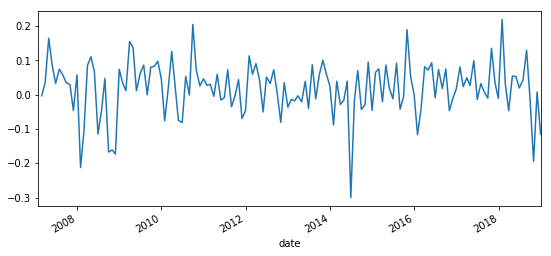

In [135]:
test_data.set_index('date')['portfolio_return'].plot(figsize=(9,4$R_{t}-RF_t = \alpha + \beta R_{M,t}-RF_t + \varepsilon_t$ is the regression. 
Hint: Merge the Fama-French data to your return dataframe of your portfolio. $R_{t}-RF_t$ this is the excess return of your portfolio and $R_{M,t}-RF_t$ the excess return of the market (EXMKT) in Fama-French
#### Report the $\alpha$ and $\beta$ of your regression))

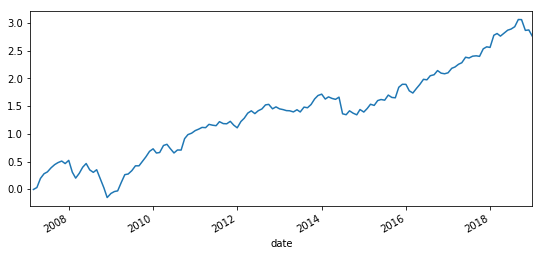

In [136]:
test_data.set_index('date')['portfolio_return'].cumsum().plot(figsize=(9,4))

We want to estimate the model

$$R_{t}-RF_t = \alpha + \beta \left(R_{M,t}-RF_t\right)+ \beta_1 \text{SML}+ \beta_1 \text{HMB} + + \beta_1 \text{UMD} + \varepsilon_t.$$ 


In [0]:
import statsmodels.formula.api as smf # load the econometrics package

In [0]:
test_data['ExcessReturn']=test_data['portfolio_return']-test_data['rf']

#### CAPM Model. What do you infer?

In [151]:
reg_CAPM = smf.ols('ExcessReturn~mktrf', data=test_data).fit(covtype='HC2')
reg_CAPM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ExcessReturn   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     106.8
Date:                Wed, 03 Jul 2019   Prob (F-statistic):           5.56e-19
Time:                        17:19:59   Log-Likelihood:                 202.91
No. Observations:                 143   AIC:                            -401.8
Df Residuals:                     141   BIC:                            -395.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0114      0.005      2.296      0.023       0.002       0.021
mktrf          1.1692      0.113     10.333      0.000       0.945       1.393
==============================================================================
Omnibus:                       56.520   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.308
Skew:                          -1.243   Prob(JB):                     5.12e-72
Kurtosis:                       9.994   Cond. No.                         22.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3-Factor Model. What do you infer?

In [150]:
reg_FF = smf.ols('ExcessReturn~mktrf+smb+hml', data=test_data).fit(cov_type='HC2')
reg_FF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ExcessReturn   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     52.67
Date:                Wed, 03 Jul 2019   Prob (F-statistic):           8.37e-23
Time:                        17:19:48   Log-Likelihood:                 217.60
No. Observations:                 143   AIC:                            -427.2
Df Residuals:                     139   BIC:                            -415.4
Df Model:                           3                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0082      0.004      1.862      0.063      -0.000       0.017
mktrf          1.3854      0.116     11.984      0.000       1.159       1.612
smb           -0.3222      0.218     -1.478      0.139      -0.749       0.105
hml           -0.9298      0.158     -5.875      0.000      -1.240      -0.620
==============================================================================
Omnibus:                       86.460   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              781.769
Skew:                          -1.936   Prob(JB):                    1.74e-170
Kurtosis:                      13.780   Cond. No.                         47.2
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

#### 3-Factor + Momentum Model. What do you infer? 

In [149]:
reg_Carhart = smf.ols('ExcessReturn~mktrf+smb+hml+umd', data=test_data).fit(cov_type='HC2')
reg_Carhart.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ExcessReturn   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     40.52
Date:                Wed, 03 Jul 2019   Prob (F-statistic):           2.02e-22
Time:                        17:19:33   Log-Likelihood:                 217.78
No. Observations:                 143   AIC:                            -425.6
Df Residuals:                     138   BIC:                            -410.8
Df Model:                           4                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0083      0.004      1.867      0.062      -0.000       0.017
mktrf          1.3690      0.123     11.161      0.000       1.129       1.609
smb           -0.3211      0.219     -1.468      0.142      -0.750       0.108
hml           -0.9751      0.157     -6.209      0.000      -1.283      -0.667
umd           -0.0657      0.106     -0.619      0.536      -0.274       0.142
==============================================================================
Omnibus:                       86.881   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.926
Skew:                          -1.949   Prob(JB):                    1.32e-171
Kurtosis:                      13.811   Cond. No.                         47.6
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""